In [1]:
ls

sample_data/


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive/ass

/content/drive/MyDrive/ass


In [4]:
ls

flowers/  Flowers-Dataset.zip


In [5]:
!unzip /content/drive/MyDrive/ass/Flowers-Dataset.zip

Archive:  /content/drive/MyDrive/ass/Flowers-Dataset.zip
replace flowers/daisy/100080576_f52e8ee070_n.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace flowers/daisy/100080576_f52e8ee070_n.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
flowers_datagen = ImageDataGenerator(rescale= 1./225,horizontal_flip=True,vertical_flip=True,zoom_range=0.2)
flowers_datagen = ImageDataGenerator(rescale = 1./255)

In [8]:
a_flowers = flowers_datagen.flow_from_directory(r"/content/drive/MyDrive/ass/flowers",target_size=(256, 256), class_mode='categorical', batch_size=32)

Found 4317 images belonging to 5 classes.


2.Create models

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [10]:
model = Sequential()

In [11]:
model.add(Convolution2D(32,(3,3),activation = "relu",input_shape = (256,256,3)))

In [12]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [13]:
model.add(Flatten())

In [14]:
model.add(Dense(300, activation = "relu"))

In [15]:
model.add(Dense(300, activation = "relu"))

In [16]:
model.add(Dense(5,activation="softmax"))

In [17]:
model.compile(loss = "categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

In [18]:
len(a_flowers)

135

In [19]:
model.fit(a_flowers, epochs= 1,validation_data=a_flowers, steps_per_epoch=len(a_flowers),validation_steps=len(a_flowers) )

135/135 [==============================] - 482s 4s/step - loss: 4.8246 - accuracy: 0.4320 - val_loss: 0.9289 - val_accuracy: 0.6722


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 516128)            0         
                                                                 
 dense (Dense)               (None, 300)               154838700 
                                                                 
 dense_1 (Dense)             (None, 300)               90300     
                                                                 
 dense_2 (Dense)             (None, 5)                 1505      
                                                        

In [21]:
model.save("flowers.h5")

Testing

In [22]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [23]:
model = load_model("/content/drive/MyDrive/ass/flowers.h5")

In [24]:
img = image.load_img(r'/content/drive/MyDrive/ass/flowers/daisy/43474673_7bb4465a86.jpg')

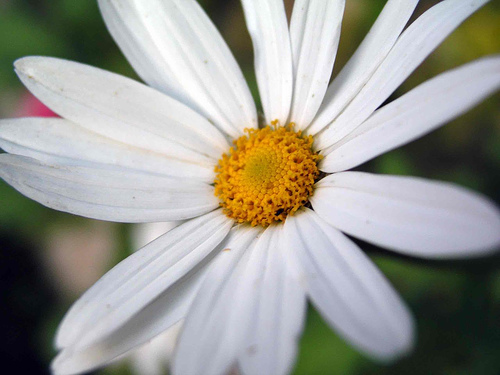

In [25]:
img

In [48]:
img = image.load_img("/content/drive/MyDrive/ass/flowers/tulip/12024561754_ce9667e4dc_n.jpg",target_size=(256,256))

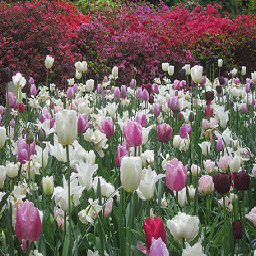

In [49]:
img

In [50]:
x = image.img_to_array(img)

In [51]:
x

array([[[ 54.,  44.,  55.],
        [ 96.,  62.,  61.],
        [108.,  59.,  89.],
        ...,
        [ 97., 117.,  54.],
        [ 68.,  84.,  39.],
        [ 68.,  86.,  38.]],

       [[ 38.,  72.,  22.],
        [151.,  84.,  78.],
        [212.,  50., 109.],
        ...,
        [114., 136.,  53.],
        [ 57.,  77.,  18.],
        [ 75.,  93.,  41.]],

       [[ 66.,  74.,  51.],
        [161.,  87., 114.],
        [149.,  88.,  83.],
        ...,
        [ 83., 104.,  25.],
        [ 71.,  89.,  41.],
        [ 70.,  85.,  54.]],

       ...,

       [[ 38.,  63.,  31.],
        [ 33.,  52.,  30.],
        [ 79.,  93.,  80.],
        ...,
        [ 33.,  58.,  37.],
        [209., 224., 219.],
        [207., 211., 220.]],

       [[ 44.,  62.,  38.],
        [ 34.,  54.,  27.],
        [ 43.,  54.,  37.],
        ...,
        [ 74.,  91.,  83.],
        [192., 204., 204.],
        [198., 201., 210.]],

       [[ 47.,  58.,  42.],
        [ 64.,  84.,  56.],
        [ 44.,  

In [52]:
x.ndim

3

In [53]:
x = np.expand_dims(x,axis= 0)

In [54]:
x.ndim

4

In [55]:
pred = model.predict(x)


In [56]:
pred

array([[0., 0., 0., 0., 1.]], dtype=float32)

In [45]:
index = ['daisy','dandelion','rose','sunflower','tulip']


In [57]:
np.argmax(pred)


4

In [58]:
index[np.argmax(pred)]

'tulip'